In [9]:
import numpy as np
import scipy.io as io
import pandas as pd
import matplotlib.pyplot as plt

# DMD
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)

    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [10]:
# Wczytanie danych z plików CSV
X = pd.read_table("War6_X.csv", delimiter=";", decimal=",")
Xprime = pd.read_table("War6_Xprime.csv", delimiter=";", decimal=",")

print(X)

     1  141,4006404  1585,896647  19329,12522  234533,5856  2850856,755  \
0    2   121.324479  1399.588645  16821.18305  204082.2508  2480136.321   
1    3   126.958778  1659.448024  20099.95888  244546.9901  2971939.160   
2    4   155.350214  1913.608991  23482.25446  284884.2838  3462338.507   
3    5   144.444707  1956.567518  23511.63852  285655.4429  3470651.449   
4    6   154.373523  1934.551838  23306.17053  283151.3239  3440725.238   
5    7   133.863412  1759.765910  21453.04378  260750.9660  3168954.728   
6    8   154.589049  1888.467817  23178.98281  281365.6415  3419513.605   
7    9   110.448798  1459.212740  17731.03699  215473.8321  2618723.037   
8   10   135.314272  1590.641515  19102.67259  232098.8343  2820932.911   
9   11   153.898943  1790.554459  21855.75170  265848.9241  3231181.276   
10  12   130.278526  1878.377536  22856.75663  277840.2310  3375823.218   
11  13   153.321862  1762.025066  21252.98127  258212.5729  3138421.813   
12  14   166.036149  1892

In [11]:
# Convert to matrix
X = np.matrix(X)
Xprime = np.matrix(Xprime)

print(X)

[[2.00000000e+00 1.21324479e+02 1.39958865e+03 1.68211830e+04
  2.04082251e+05 2.48013632e+06 3.01409262e+07 3.66299219e+08
  4.45158632e+09 5.40995523e+10 6.57465000e+11 7.99009000e+12
  9.71025000e+13 1.18007000e+15 1.43413000e+16 1.74288000e+17
  2.11810000e+18 2.57410000e+19 3.12826000e+20 3.80174000e+21
  4.62021000e+22 5.61488000e+23 6.82369000e+24 8.29274000e+25
  1.00781000e+27 1.22477000e+28 1.48845000e+29 1.80889000e+30
  2.19833000e+31 2.67160000e+32 3.24676000e+33 3.94574000e+34
  4.79521000e+35 5.82756000e+36 7.08216000e+37 8.60685000e+38]
 [3.00000000e+00 1.26958778e+02 1.65944802e+03 2.00999589e+04
  2.44546990e+05 2.97193916e+06 3.61180196e+07 4.38936914e+08
  5.33434404e+09 6.48275911e+10 7.87841000e+11 9.57453000e+12
  1.16358000e+14 1.41408000e+15 1.71852000e+16 2.08849000e+17
  2.53812000e+18 3.08454000e+19 3.74861000e+20 4.55563000e+21
  5.53640000e+22 6.72832000e+23 8.17683000e+24 9.93720000e+25
  1.20766000e+27 1.46765000e+28 1.78361000e+29 2.16760000e+30
  2.634

In [14]:
# Obliczenie macierzy A
Phi, Lambda, b = DMD(X[:,:-1],Xprime[:,1:],5)

print("Phi:", Phi)
print("Lambda: ", Lambda)
print("b:", b)

print("Phi shape:", Phi.shape)

Phi: [[ -24.36076299  +0.j          -31.86669499  -5.12644821j
   -31.86669499  +5.12644821j   -6.28103261  -7.39061412j
    -6.28103261  +7.39061412j]
 [ -29.19154814  +0.j          -18.18293858 +14.69915503j
   -18.18293858 -14.69915503j  -23.36994581  -3.55337804j
   -23.36994581  +3.55337804j]
 [ -34.00813244  +0.j         -108.71694814  +8.21642082j
  -108.71694814  -8.21642082j  -45.69937817  +3.24225123j
   -45.69937817  -3.24225123j]
 [ -34.09003042  +0.j          -20.53561112+106.41305862j
   -20.53561112-106.41305862j   20.04466609 -42.88210017j
    20.04466609 +42.88210017j]
 [ -33.79642354  +0.j         -100.73382858 +21.55644839j
  -100.73382858 -21.55644839j  -56.87259924 +16.32239114j
   -56.87259924 -16.32239114j]
 [ -31.12652214  +0.j           55.66116954 -78.79578237j
    55.66116954 +78.79578237j   30.49053229 -10.9638434j
    30.49053229 +10.9638434j ]
 [ -33.58683998  +0.j           11.95589228 -10.46754489j
    11.95589228 +10.46754489j  -29.56266749  +6.07203621

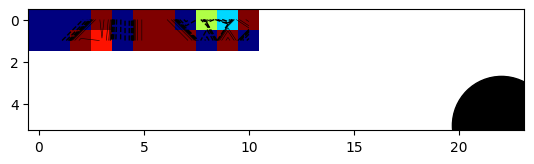

In [24]:
# Wykresy
## Plot Mode 2
vortmin = -5
vortmax = 5
V2 = np.copy(np.real(np.reshape(Phi[:,1], (11,2))))
V2 = V2.T

# normalize values... not symmetric
minval = np.min(V2)
maxval = np.max(V2)

if np.abs(minval) < 5 and np.abs(maxval) < 5:
    if np.abs(minval) > np.abs(maxval):
        vortmax = maxval
        vortmin = -maxval
    else:
        vortmin = minval
        vortmax = -minval

V2[V2 > vortmax] = vortmax
V2[V2 < vortmin] = vortmin

plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

plt.scatter(22,5,5000,color='k') # draw cylinder


plt.show()

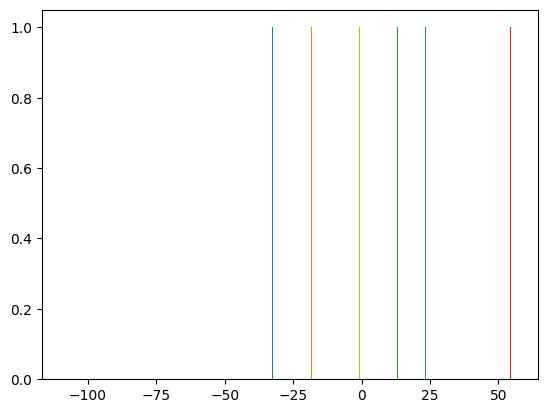

In [26]:
V2 = np.real(np.reshape(Phi[:,1], (2,11)))

# plt.hist(np.real(Phi).reshape(-1),128)
plt.hist(V2.reshape(-1),128)
plt.show()